# YOUR PYTHON 2020 WRAPPED
### Spotify Data Analysis

Contributors:
* Robert Hall
* Ryan Berberek
* Ximena Cid Sanabria
* Max Moran

### Table of Contents:

1. Data Importation & Exploratory Data Analysis
2. Who Are The Top 5 Artists Represented In The Dataset?
3. What Genre Categories Are Represented? What Is The Proportional Distribution Of Genres?
4. Visualizing Each Variable's Correlation With The Others Using A Correlation Matrix
5. Linear Model To Analyze The Correlation Between Song Duration (`song_duration`) And Popularity Score (`track_score`)
6. Linear Model To Analyze The Correlation Between Perceived Song Energy (`energy`) And Percieved Song Loudness (`loudness`)
7. Comparative Analysis On Performance Of The Prior Two Linear Models

### Introduction

For this project, we focused on a 2020 Spotify dataset and the effects it had on holistic observations for over 32k tracks. This can help us better understand exactly why a song performs well in certain areas. After cleaning and a general overview of the data, we looked at correlation, proportions, and created linear models to analyze variables of interest. We plan to use pie charts, correlation matrices, and scikit-learn regression models to address the problem. Our analysis will serve users in helping accurately identify why a track performs or feels the way it does.

### 1. Data Importation & Exploratory Data Analysis

In [1]:
# import pandas and set up dataframe
import pandas as pd
data = pd.read_csv('spotify_songs.csv')
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [2]:
# check what features are available, and the datatypes of each feature 
data.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

### 2. Who Are The Top 5 Artists Represented In The Dataset?

In [3]:
# dataframe containing only features track_artist, track_popularity
artist_scores = data[['track_artist', 'track_popularity']]

# check for null values
artist_scores.isnull().sum()

track_artist        5
track_popularity    0
dtype: int64

In [4]:
# drop instances where track_artist is null
artist_scores = artist_scores.dropna(subset=['track_artist'])

# check once again for null values
artist_scores.isnull().sum()

track_artist        0
track_popularity    0
dtype: int64

In [5]:
# generate the dataframe of average artist scores, in descending order
highest_scores = artist_scores.groupby('track_artist')['track_popularity'].mean().reset_index()

# sort highest scores in descending order
highest_scores = highest_scores.sort_values(by='track_popularity', ascending=False)

# get the top 5 scores
highest_scores  = highest_scores[0:5]

# round track_popularity to 2 decimal places
highest_scores['track_popularity'] = round(highest_scores['track_popularity'], 2)

# rename columns to more apt titles
highest_scores.rename(columns={'track_artist': 'Artist',
                               'track_popularity': 'Average Popularity Score'})

,Artist,Average Popularity Score
9735,Trevor Daniel,97.00
10242,Y2K,91.00
2601,Don Toliver,90.71
7959,Roddy Ricch,88.21
2209,DaBaby,87.86


In [6]:
# VISUALIZATION HERE

### 3. What Genre Categories Are Represented? What Is The Proportional Distribution Of Genres?

In [7]:
# Code Here

### 4. Visualizing Each Variable's Correlation With The Others Using A Correlation Matrix

In [8]:
# Code Here

### 5. Linear Model To Analyze The Correlation Between Song Duration (`song_duration`) And Popularity Score (`track_score`)

In [44]:
# import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# create new feature 'duration_min' out of 'duration_ms'
data['duration_min'] = data['duration_ms'] / 60000

# define input features and prediction variable
X = data[['duration_min']]
y = data['track_popularity']

# split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

# build and fit model
model_dur_pop = LinearRegression()
model_dur_pop.fit(X_train, y_train)

# get predicted values
y_pred_dur_pop = model_dur_pop.predict(X_test)

Text(0, 0.5, 'Track Popularity')

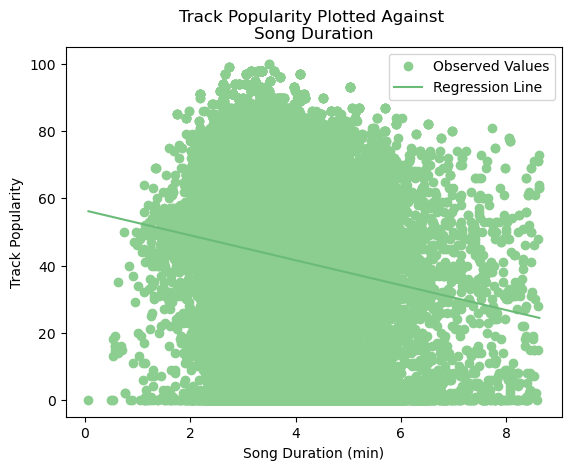

In [45]:
# get predicted y-values for all x instead of only the test subset, to match the length when plotting against all 
pred_y_dur_pop = model_dur_pop.predict(X)

# create dataframe for plot
plot_df = pd.DataFrame({"Duration (min)": X['duration_min'],
                        "Actual Popularity": y,
                        "Predicted Popularity": pred_y_dur_pop})

import seaborn as sns
sns.set_palette('Greens_d')

# Create scatter plot for observed data points
ax = plot_df.plot(x='Duration (min)', y='Actual Popularity', style='o', label='Observed Values')

# Create line plot for the fitted line
plot_df.sort_values('Duration (min)', inplace=True)
plot_df.plot(x='Duration (min)', y='Predicted Popularity', kind='line', ax=ax, label='Regression Line')
#plt.ylim(-0.125, 1)
#plt.xlim(-30, 0)

# Add titles and labels
ax.set_title('Track Popularity Plotted Against \nSong Duration')
ax.set_xlabel('Song Duration (min)')
ax.set_ylabel('Track Popularity')

The datapoints are scattered every which way from the line and show no convergence around a single trend. The regression line is negative and downsloping, but this does not offset the high variance in the dataset, which we can infer means the duration (time length) of a song holds little explaination for the song's popularity score. 

In [46]:
# get coefficient, intercept, and regression line equation for the loudness-energy model
coef_duration_popularity = model_dur_pop.coef_[0]
intercept_duration_popularity = model_dur_pop.intercept_
regline_duration_popularity = f"y = {round(model_dur_pop.coef_[0], 2)}x + {round(model_dur_pop.intercept_, 2)}"

# import metric functions from sklearn metrics library
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# get standard metrics (for later comparative analysis)
R2_duration_popularity = r2_score(y_test, y_pred_dur_pop) # R^2 coefficient
mae_duration_popularity = mean_absolute_error(y_test, y_pred_dur_pop) # mean absolute error
mse_duration_popularity = mean_squared_error(y_test, y_pred_dur_pop) # mean squared error

### 6. Linear Model To Analyze The Correlation Between Perceived Song Energy (`energy`) And Percieved Song Loudness (`loudness`)

In [47]:
# check the descriptive statistics of the features of interest
data[['loudness', 'energy']].describe()

,loudness,energy
count,32833.000000,32833.000000
mean,-6.719499,0.698619
std,2.988436,0.180910
min,-46.448000,0.000175
25%,-8.171000,0.581000
50%,-6.166000,0.721000
75%,-4.645000,0.840000
max,1.275000,1.000000


In [48]:
# import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# define input features and prediction variable
X = data[['loudness']]
y = data['energy']

# split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

# build and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# get predicted values
y_pred = model.predict(X_test)

Text(0, 0.5, 'Energy Score')

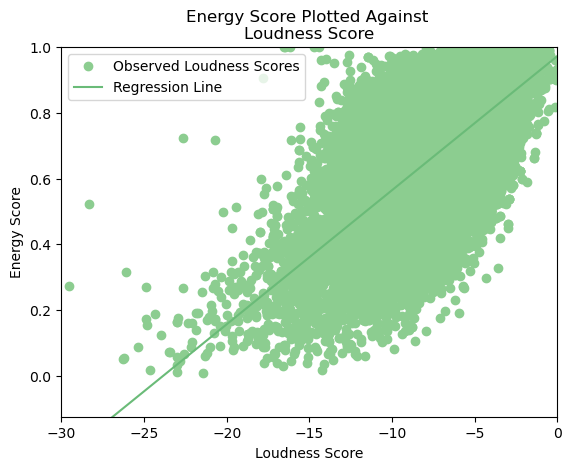

In [49]:
# generate scatterplot with regression line for predicted energy score given loudness score
import matplotlib.pyplot as plt
import seaborn as sns

# regenerate predicted energy values for all loudness scores to match length with all actual energy values
pred_y = model.predict(X)

# create dataframe for plot
plot_df = pd.DataFrame({"Loudness": X['loudness'],
                        "Actual Energy": y,
                        "Predicted Energy": pred_y})

sns.set_palette('Greens_d')

# Create scatter plot for observed data points
ax = plot_df.plot(x='Loudness', y='Actual Energy', style='o', label='Observed Loudness Scores')

# Create line plot for the fitted line
plot_df.sort_values('Loudness', inplace=True)
plot_df.plot(x='Loudness', y='Predicted Energy', kind='line', ax=ax, label='Regression Line')
plt.ylim(-0.125, 1)
plt.xlim(-30, 0)

# Add titles and labels
ax.set_title('Energy Score Plotted Against \nLoudness Score')
ax.set_xlabel('Loudness Score')
ax.set_ylabel('Energy Score')

The trendline indicates a positive correlation between percieved loudness and percieved energy. The datapoints appear to have high variance from the regression line, indicating a week correlation. It is inferrable that an increase in the song's percieved loudness creates an increase in the song's percieved energy among typical listeners. 

In [50]:
# get coefficient, intercept, and regression line equation for the loudness-energy model
coef_loudness_energy = model.coef_[0]
intercept_loudness_energy = model.intercept_
regline_loudness_energy = f"y = {round(model.coef_[0], 2)}x + {round(model.intercept_, 2)}"

# import metric functions from sklearn metrics library
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# get standard metrics (for later comparative analysis)
R2_loudness_energy = r2_score(y_test, y_pred) # R^2 coefficient
mae_loudness_energy = mean_absolute_error(y_test, y_pred) # mean absolute error
mse_loudness_energy = mean_squared_error(y_test, y_pred) # mean squared error

### 7. Comparative Analysis On Performance Of The Prior Two Linear Models

In [51]:
# basic model aspects for the each model
print("DURATION-POPULARITY MODEL:\n")
print(f"Coefficient:                    {coef_duration_popularity}")
print(f"Intercept:                      {intercept_duration_popularity}")
print(f"Regression Line Equation:       {regline_duration_popularity}\n")

# basic model aspects for the duration-popularity model
print("LOUDNESS-ENERGY MODEL:\n")
print(f"Coefficient:                    {coef_loudness_energy}")
print(f"Intercept:                      {intercept_loudness_energy}")
print(f"Regression Line Equation:       {regline_loudness_energy}")

DURATION-POPULARITY MODEL:

Coefficient:                    -3.706610865570537
Intercept:                      56.399705823265386
Regression Line Equation:       y = -3.71x + 56.4

LOUDNESS-ENERGY MODEL:

Coefficient:                    0.0408194692017623
Intercept:                      0.9728328812539959
Regression Line Equation:       y = 0.04x + 0.97


In [52]:
# compare R^2 scores
print(f"R2 Score for Duration-Popularity Model:     {R2_duration_popularity}")
print(f"R2 Score for Loudness-Energy Model:         {R2_loudness_energy}")

R2 Score for Duration-Popularity Model:     0.016437947445612888
R2 Score for Loudness-Energy Model:         0.4625041495818246


In [53]:
# compare mean absolute error scores
print(f"Mean Absolute Error for Duration-Popularity Model:     {mae_duration_popularity}")
print(f"Mean Absolute Error for Loudness-Energy Model:         {mae_loudness_energy}")

Mean Absolute Error for Duration-Popularity Model:     20.512155857095998
Mean Absolute Error for Loudness-Energy Model:         0.10575994521263009


In [55]:
# compare mean squared error scores
print(f"Mean Squared Error for Duration-Popularity Model:     {mse_duration_popularity}")
print(f"Mean Squared Error for Loudness-Energy Model:         {mse_loudness_energy}")

Mean Squared Error for Duration-Popularity Model:     606.091898499038
Mean Squared Error for Loudness-Energy Model:         0.017476244460881488


#### Conclusions:

* There is a noticable relationship between a song's percieved loudness and its percieved energy; there is no such significant relationship between a song's duration length and its popularity
* The Loudness-Energy model accounts for approximately 46.3% of variability in the dataset, whereas the Duration-Popularity model accounts for only 1.64% of variability
* The Duration-Popularity model has noticably higher error scores than does the Loudness-Energy model